In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
%run 4.3.2-common.ipynb

Principal values are tensor([9736.4033, 7876.6592])


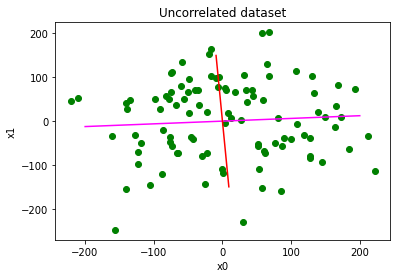

Loss in Information due to
dimensionality reduction: 62.484107971191406
(high - we're losing real info)


In [3]:
# Let us now try a similar experiment with
# uncorrelated data 
N = 100
torch.manual_seed(42)
x_0 = torch.normal(0, 100, (N,))
x_1 = torch.normal(0, 100, (N,))
X = torch.column_stack((x_0, x_1))

# Perform PCA
# Note that principal values are close to
# each other - the spread is comparable in both
# directions.
principal_values, principal_components = pca(X)
principal_values = principal_values.real
principal_components = principal_components.real
print("Principal values are {}".format(principal_values))

# Find the index with highest principal value
major_index = torch.argmax(principal_values)
minor_index = torch.argmin(principal_values)

# Plot
plt.figure()
plt.scatter(X[:, 0], X[: , 1],
            color="green")
plt.title('Uncorrelated dataset')
plt.xlabel('x0')
plt.ylabel('x1')

# Let us plot the principal components
draw_line(principal_components[:, major_index].numpy(),
          min_x=-200, max_x=200)
draw_line(principal_components[:, minor_index].numpy(),
          min_x=-150, max_x=150, color="red")
plt.show()

first_principal_vec = principal_components[:,
                                           major_index]
first_principal_vec = first_principal_vec.reshape((-1,
                                                   1))
X_proj = torch.matmul(X, first_principal_vec)

# Information lost due to dimensionality reduction.
# (here we've lost real info)
X_back_proj = torch.matmul(X_proj,
                     torch.linalg.pinv(first_principal_vec))
info_loss = torch.sqrt(torch.mean((X_back_proj - X)**2))
print("Loss in Information due to\ndimensionality"
      " reduction: {}\n(high - we're "
      "losing real info)".format(info_loss))